**Import Libraries**

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbor
from sklearn.neural_network import MLPClassifier #neural network
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.naive_bayes import GaussianNB #gaussian naive bayes
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_auc_score #roc score

import warnings
warnings.filterwarnings('ignore')

In [2]:
label = LabelEncoder()

**Read Data of Applications**

In [4]:
data_train = pd.read_csv('/Users/mac/Downloads/home-credit-default-risk/application_train.csv')

In [5]:
data_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data_test = pd.read_csv('/Users/mac/Downloads/home-credit-default-risk/application_test.csv')

In [7]:
data_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


**Find the Difference between 2 Datas**

In [8]:
for col in data_train.columns[data_train.dtypes == 'object']:
    col_train = set(data_train[col].unique())
    col_test = set(data_test[col].unique())
    diff = col_train - col_test
    if len(diff) > 0:
        print('feature ' + col + ' has different values: ', diff)

feature CODE_GENDER has different values:  {'XNA'}
feature NAME_INCOME_TYPE has different values:  {'Maternity leave'}
feature NAME_FAMILY_STATUS has different values:  {'Unknown'}


**Fix structural** **errors** **(Change into Null values)**





In [9]:
data_train['CODE_GENDER'] = data_train['CODE_GENDER'].map(lambda x: x if x != 'XNA' else np.nan)
data_train['NAME_INCOME_TYPE'] = data_train['NAME_INCOME_TYPE'].map(lambda x: x if x != 'Maternity leave' else np.nan)
data_train['NAME_FAMILY_STATUS'] = data_train['NAME_FAMILY_STATUS'].map(lambda x: x if x != 'Unknown' else np.nan)

**`Create Encoder Label`**

In [10]:
for col in data_train.columns[data_train.dtypes == 'object']:
    d = data_train[col].value_counts()
    if data_train[col].nunique() == 2:
        d[0] = 0
        d[1] = 1      
    data_train[col] = data_train[col].map(d)
    data_test[col] = data_test[col].map(d)

In [11]:
data_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1.0,0,0,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0.0,0,1,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1.0,1,0,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0.0,0,0,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,1.0,0,0,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
data_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,0,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,1,0,0,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,0,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,0,0,0,0,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,0,1,1,1,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


**Read + Combined Data of Bureau**

In [13]:
bureau = pd.read_csv('/Users/mac/Downloads/home-credit-default-risk/bureau.csv')

In [14]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [15]:
for col in bureau.columns[bureau.dtypes=='object']:
    bureau[col] = label.fit_transform(bureau[col])

bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,2,0,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,3,-131,NaN
1,215354,5714463,0,0,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,4,-20,NaN
2,215354,5714464,0,0,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,3,-16,NaN
3,215354,5714465,0,0,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,4,-16,NaN
4,215354,5714466,0,0,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,3,-21,NaN


**Read + Combined Data of Bureau Balance**

In [16]:
bureau_balance = pd.read_csv('/Users/mac/Downloads/home-credit-default-risk/bureau_balance.csv')

In [17]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [18]:
for val in bureau_balance['STATUS'].unique():
    bureau_balance['STATUS_' + val] = (bureau_balance['STATUS'] == val).map(int)

bureau_balance.drop(columns=['STATUS'], inplace = True)
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS_C,STATUS_0,STATUS_X,STATUS_1,STATUS_2,STATUS_3,STATUS_5,STATUS_4
0,5715448,0,1,0,0,0,0,0,0,0
1,5715448,-1,1,0,0,0,0,0,0,0
2,5715448,-2,1,0,0,0,0,0,0,0
3,5715448,-3,1,0,0,0,0,0,0,0
4,5715448,-4,1,0,0,0,0,0,0,0


In [19]:
for col in bureau_balance.drop(columns=['SK_ID_BUREAU']).columns:
    res = bureau_balance.groupby(by = 'SK_ID_BUREAU')[col].mean()
    bureau['Balance_' + str(col)] = bureau['SK_ID_BUREAU'].map(lambda x: res[x] if x in res.index else np.nan)

In [20]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,...,AMT_ANNUITY,Balance_MONTHS_BALANCE,Balance_STATUS_C,Balance_STATUS_0,Balance_STATUS_X,Balance_STATUS_1,Balance_STATUS_2,Balance_STATUS_3,Balance_STATUS_5,Balance_STATUS_4
0,215354,5714462,2,0,-497,0,-153.0,-153.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,215354,5714463,0,0,-208,0,1075.0,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,215354,5714464,0,0,-203,0,528.0,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,215354,5714465,0,0,-203,0,NaN,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,215354,5714466,0,0,-629,0,1197.0,NaN,77674.5,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Read Data Installments Payment**

In [21]:
installments_pay = pd.read_csv('/Users/mac/Downloads/home-credit-default-risk/installments_payments.csv')

In [22]:
installments_pay.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


**Read Data Credit Card + Labelling**

In [23]:
credit_card = pd.read_csv('/Users/mac/Downloads/home-credit-default-risk/credit_card_balance.csv')

In [24]:
credit_card.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [25]:
credit_card['NAME_CONTRACT_STATUS'] = label.fit_transform(credit_card['NAME_CONTRACT_STATUS'])

**Read Data Pos Cash Balance + Labelling**

In [26]:
pos_cash_balance = pd.read_csv('/Users/mac/Downloads/home-credit-default-risk/POS_CASH_balance.csv')

In [27]:
pos_cash_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [28]:
pos_cash_balance['NAME_CONTRACT_STATUS'] = label.fit_transform(pos_cash_balance['NAME_CONTRACT_STATUS'])

**Read Data Previous Application + Labelling**

In [29]:
prev_app = pd.read_csv('/Users/mac/Downloads/home-credit-default-risk/previous_application.csv')

In [30]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
prev_app['NAME_CONTRACT_TYPE'] = label.fit_transform(prev_app['NAME_CONTRACT_TYPE'])
prev_app['WEEKDAY_APPR_PROCESS_START'] = label.fit_transform(prev_app['WEEKDAY_APPR_PROCESS_START'])
prev_app['NAME_SELLER_INDUSTRY'] = label.fit_transform(prev_app['NAME_SELLER_INDUSTRY'])
prev_app['NAME_YIELD_GROUP'] = label.fit_transform(prev_app['NAME_YIELD_GROUP'])
prev_app['PRODUCT_COMBINATION'] = label.fit_transform(prev_app['PRODUCT_COMBINATION'])

**Combined Data Installments Data + Previous Application**

In [32]:
for col in installments_pay.drop(columns=['SK_ID_PREV', 'SK_ID_CURR']).columns:
    res = installments_pay.groupby(by = 'SK_ID_PREV')[col].mean()
    prev_app['IP_' + col] = prev_app['SK_ID_PREV'].map(lambda x: res[x] if x in res.index else np.nan)

**Combined Data Credit Card + Previous Application**

In [33]:
for col in credit_card.drop(columns=['SK_ID_PREV', 'SK_ID_CURR']).columns:
    res = credit_card.groupby(by = 'SK_ID_PREV')[col].mean()
    prev_app['CCB_' + col] = prev_app['SK_ID_PREV'].map(lambda x: res[x] if x in res.index else np.nan)

**Combined Data Pos Cash Balance + Previous Application**

In [34]:
for col in pos_cash_balance.drop(columns=['SK_ID_PREV', 'SK_ID_CURR']).columns:
    res = pos_cash_balance.groupby(by = 'SK_ID_PREV')[col].mean()
    prev_app['POS_' + col] = prev_app['SK_ID_PREV'].map(lambda x: res[x] if x in res.index else np.nan)

**Merging Datas**

In [35]:
prev_app_merged = prev_app.copy()
bureau_merged = bureau.copy()

In [36]:
for col in bureau_merged.drop(columns = ['SK_ID_CURR', 'SK_ID_BUREAU']).columns:
    res = bureau_merged.groupby(by = 'SK_ID_CURR')[col].mean()
    data_train['Bureau_' + str(col)] = bureau_merged['SK_ID_CURR'].map(lambda x: res[x] if x in res.index else np.nan)
    data_test['Bureau_' + str(col)] = bureau_merged['SK_ID_CURR'].map(lambda x: res[x] if x in res.index else np.nan)

In [44]:
data_train.shape

(307511, 154)

In [45]:
data_test.shape

(48744, 153)

In [46]:
for col in prev_app_merged.drop(columns=['SK_ID_CURR', 'SK_ID_PREV']).columns:
    res = prev_app_merged.groupby(by = 'SK_ID_CURR')[col].mean()
    data_test['Prev_' + str(col)] = prev_app_merged['SK_ID_CURR'].map(lambda x: res[x] if x in res.index else np.nan)

TypeError: Could not convert Y to numeric

In [43]:
for col in prev_app_merged.drop(columns=['SK_ID_CURR', 'SK_ID_PREV']).columns:
    res = prev_app_merged.groupby(by = 'SK_ID_CURR')[col].mean()
    data_train['Prev_' + str(col)] = prev_app_merged['SK_ID_CURR'].map(lambda x: res[x] if x in res.index else np.nan)
   # app_test['Prev_' + str(col)] = prev_app_merged['SK_ID_CURR'].map(lambda x: res[x] if x in res.index else np.nan)

TypeError: Could not convert Y to numeric

In [47]:
data_train.to_csv('after_train.csv')

In [48]:
data_test.to_csv('after_test.csv')

In [49]:
def reduce_mem_usage(df):
    
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

def import_data(file):
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [50]:
df_train = import_data('/Users/mac/Downloads/home-credit-default-risk/after_train.csv')

Memory usage of dataframe is 363.65 MB
Memory usage after optimization is: 95.60 MB
Decreased by 73.7%


In [51]:
df_test = import_data('/Users/mac/Downloads/home-credit-default-risk/after_test.csv')

Memory usage of dataframe is 57.27 MB
Memory usage after optimization is: 14.97 MB
Decreased by 73.9%


**Combined Data Train & Test + Cleaning Datas**

In [52]:
data = df_train.append(df_test)

In [53]:
data['TARGET'][307511:]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
48739   NaN
48740   NaN
48741   NaN
48742   NaN
48743   NaN
Name: TARGET, Length: 48744, dtype: float64

In [54]:
data_new = data.drop(columns=['TARGET'])
data_new.head()

,Unnamed: 0,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,Bureau_Balance_STATUS_5,Bureau_Balance_STATUS_4,Prev_NAME_CONTRACT_TYPE,Prev_AMT_ANNUITY,Prev_AMT_APPLICATION,Prev_AMT_CREDIT,Prev_AMT_DOWN_PAYMENT,Prev_AMT_GOODS_PRICE,Prev_WEEKDAY_APPR_PROCESS_START,Prev_HOUR_APPR_PROCESS_START
0,0,100002,0,1.0,0,0,0,202500.0,406597.5,24700.5,...,NaN,NaN,1.000000,27468.824219,641848.50000,630571.500000,60000.000000,641848.50000,2.333984,15.664062
1,1,100003,0,0.0,0,1,0,270000.0,1293502.5,35698.5,...,NaN,NaN,0.833496,13039.485352,201525.75000,257522.250000,8250.000000,241830.90625,4.667969,10.500000
2,2,100004,1,1.0,1,0,0,67500.0,135000.0,6750.0,...,NaN,NaN,0.750000,9623.115234,66690.00000,72696.375000,4785.750000,88920.00000,3.750000,10.750000
3,3,100006,0,0.0,0,0,0,135000.0,312682.5,29686.5,...,NaN,NaN,0.043488,28022.556641,259705.00000,272578.500000,956.904541,284438.81250,2.478516,9.257812
4,4,100007,0,1.0,0,0,0,121500.0,513000.0,21865.5,...,NaN,NaN,0.320068,21187.628906,179037.71875,208061.640625,2076.750000,263290.75000,2.599609,10.921875


In [55]:
sum(data_new.isna().sum())/(data_new.shape[0]*data_new.shape[1])*100

22.916665375578233

In [56]:
data_missing = pd.DataFrame(data_new.isnull().sum() / len(data_new)).sort_values(by=0, ascending=False)
data_missing[:10]

,0
COMMONAREA_AVG,0.697141
COMMONAREA_MEDI,0.697141
COMMONAREA_MODE,0.697141
NONLIVINGAPARTMENTS_MEDI,0.692933
NONLIVINGAPARTMENTS_AVG,0.692933
NONLIVINGAPARTMENTS_MODE,0.692933
FONDKAPREMONT_MODE,0.682354
LIVINGAPARTMENTS_MODE,0.682037
LIVINGAPARTMENTS_AVG,0.682037
LIVINGAPARTMENTS_MEDI,0.682037


In [57]:
drop = data_missing[data_missing[0] > 0.7]
drop

,0


In [58]:
data_new.drop(columns=drop.index, inplace=True)
data_new.shape

(356255, 154)

In [59]:
for feature in  data_missing[(data_missing[0] > 0) & (data_missing[0] <= 0.7)].index:
    data_new[feature] = data_new[feature].fillna(data_new[feature].median())

In [60]:
sum(data_new.isna().sum())/(data_new.shape[0]*data_new.shape[1])*100

0.0

**Handling Variables with Small Variances**

In [61]:
small_variance = data_new.columns[(data_new.std(axis = 0) < .01).values]

In [62]:
small_variance

Index(['CODE_GENDER', 'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION',
       'OWN_CAR_AGE', 'FLAG_MOBIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_12',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'Bureau_CREDIT_ACTIVE',
       'Bureau_CREDIT_CURRENCY', 'Bureau_DAYS_CREDIT',
       'Bureau_CREDIT_DAY_OVERDUE', 'Bureau_DAYS_CREDIT_ENDDATE',
       'Bureau_DAYS_ENDDATE_FACT', 'Bureau_CNT_CREDIT_

In [63]:
data_new.drop(columns = small_variance, inplace=True)

In [64]:
data_new.shape

(356255, 102)

In [65]:
data_new['TARGET'] = data['TARGET']

In [66]:
data_new.shape

(356255, 103)

In [67]:
data_new['TARGET']

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
48739    NaN
48740    NaN
48741    NaN
48742    NaN
48743    NaN
Name: TARGET, Length: 356255, dtype: float64

In [68]:
data_final = data_new.copy()

In [69]:
data_final.to_csv('data_final.csv')

**Visualization Datas**

In [70]:
data_final = import_data('/Users/mac/Downloads/home-credit-default-risk/data_final.csv')

Memory usage of dataframe is 282.67 MB
Memory usage after optimization is: 78.82 MB
Decreased by 72.1%


In [71]:
data_final.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [72]:
data_final.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,Bureau_AMT_CREDIT_SUM_OVERDUE,Bureau_AMT_ANNUITY,Bureau_Balance_STATUS_1,Bureau_Balance_STATUS_5,Prev_AMT_ANNUITY,Prev_AMT_APPLICATION,Prev_AMT_CREDIT,Prev_AMT_DOWN_PAYMENT,Prev_AMT_GOODS_PRICE,TARGET
0,100002,0,0,0,0,202500.0,406597.5,24700.5,351000.0,248526.0,...,0.0,6712.5,0.0,0.0,27468.824219,641848.50000,630571.500000,60000.000000,641848.50000,1.0
1,100003,0,0,1,0,270000.0,1293502.5,35698.5,1129500.0,40149.0,...,0.0,6712.5,0.0,0.0,13039.485352,201525.75000,257522.250000,8250.000000,241830.90625,0.0
2,100004,1,1,0,0,67500.0,135000.0,6750.0,135000.0,248526.0,...,0.0,6712.5,0.0,0.0,9623.115234,66690.00000,72696.375000,4785.750000,88920.00000,0.0
3,100006,0,0,0,0,135000.0,312682.5,29686.5,297000.0,248526.0,...,0.0,6712.5,0.0,0.0,28022.556641,259705.00000,272578.500000,956.904541,284438.81250,0.0
4,100007,0,0,0,0,121500.0,513000.0,21865.5,513000.0,248526.0,...,0.0,6712.5,0.0,0.0,21187.628906,179037.71875,208061.640625,2076.750000,263290.75000,0.0


In [73]:
train_data = data_final[:307511]

In [74]:
train_data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,Bureau_AMT_CREDIT_SUM_OVERDUE,Bureau_AMT_ANNUITY,Bureau_Balance_STATUS_1,Bureau_Balance_STATUS_5,Prev_AMT_ANNUITY,Prev_AMT_APPLICATION,Prev_AMT_CREDIT,Prev_AMT_DOWN_PAYMENT,Prev_AMT_GOODS_PRICE,TARGET
0,100002,0,0,0,0,202500.0,406597.5,24700.5,351000.0,248526.0,...,0.0,6712.5,0.0,0.0,27468.824219,641848.50000,630571.500000,60000.000000,641848.50000,1.0
1,100003,0,0,1,0,270000.0,1293502.5,35698.5,1129500.0,40149.0,...,0.0,6712.5,0.0,0.0,13039.485352,201525.75000,257522.250000,8250.000000,241830.90625,0.0
2,100004,1,1,0,0,67500.0,135000.0,6750.0,135000.0,248526.0,...,0.0,6712.5,0.0,0.0,9623.115234,66690.00000,72696.375000,4785.750000,88920.00000,0.0
3,100006,0,0,0,0,135000.0,312682.5,29686.5,297000.0,248526.0,...,0.0,6712.5,0.0,0.0,28022.556641,259705.00000,272578.500000,956.904541,284438.81250,0.0
4,100007,0,0,0,0,121500.0,513000.0,21865.5,513000.0,248526.0,...,0.0,6712.5,0.0,0.0,21187.628906,179037.71875,208061.640625,2076.750000,263290.75000,0.0


In [75]:
for columns in train_data.columns:
    print(columns)

SK_ID_CURR
NAME_CONTRACT_TYPE
FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_ID_PUBLISH
FLAG_EMP_PHONE
FLAG_WORK_PHONE
FLAG_CONT_MOBILE
FLAG_PHONE
FLAG_EMAIL
REGION_RATING_CLIENT
REGION_RATING_CLIENT_W_CITY
WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
REG_REGION_NOT_LIVE_REGION
REG_REGION_NOT_WORK_REGION
LIVE_REGION_NOT_WORK_REGION
REG_CITY_NOT_LIVE_CITY
REG_CITY_NOT_WORK_CITY
LIVE_CITY_NOT_WORK_CITY
ORGANIZATION_TYPE
APARTMENTS_AVG
BASEMENTAREA_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
COMMONAREA_MODE
ELEVATORS_MODE
ENTRANCES_MODE
LANDAREA_MODE
LIVINGAPARTMENTS_MODE
LIVINGAREA_MODE
NONLIVINGAPARTMENTS_MODE
NONLIVINGAREA_MODE
APARTMENTS_MEDI
BASEMENTAREA_MEDI
COMMONAREA_MEDI
ELEVATORS

**Distribution from Target**

<AxesSubplot:xlabel='TARGET', ylabel='count'>

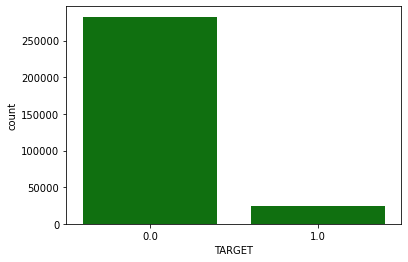

In [76]:
sns.countplot(train_data['TARGET'], color='green')

In [77]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 102 entries, SK_ID_CURR to TARGET
dtypes: float16(39), float32(21), int16(2), int32(6), int8(34)
memory usage: 65.7 MB


**Distribution from Gender**

<AxesSubplot:xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

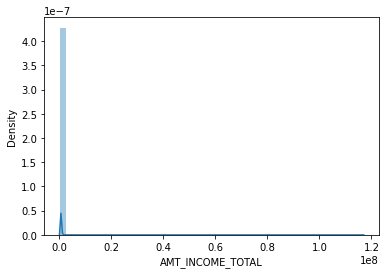

In [78]:
sns.distplot(train_data['AMT_INCOME_TOTAL'])

<AxesSubplot:xlabel='AMT_CREDIT', ylabel='Density'>

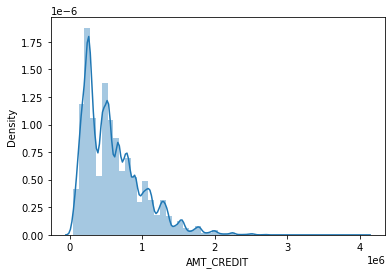

In [79]:
sns.distplot(train_data['AMT_CREDIT'])

<AxesSubplot:xlabel='AMT_ANNUITY', ylabel='Density'>

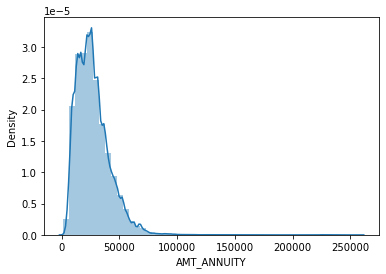

In [80]:
sns.distplot(train_data['AMT_ANNUITY'])

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

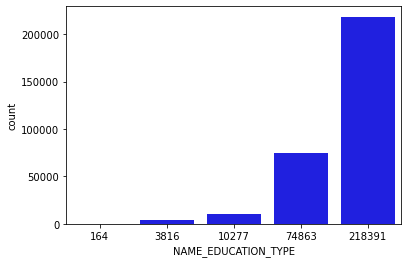

In [81]:
sns.countplot(train_data['NAME_EDUCATION_TYPE'], color='blue')

<AxesSubplot:xlabel='NAME_INCOME_TYPE', ylabel='count'>

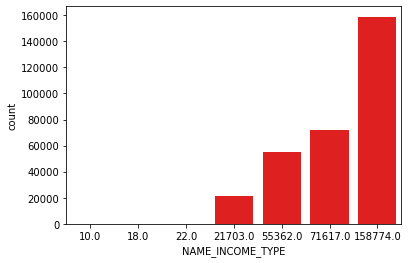

In [82]:
sns.countplot(train_data['NAME_INCOME_TYPE'], color='red')

In [83]:
no_age = train_data[train_data['TARGET']==0]['DAYS_BIRTH'].values/-365
yes_age = train_data[train_data['TARGET']==1]['DAYS_BIRTH'].values/-365

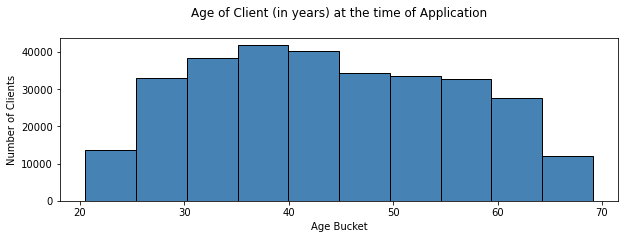

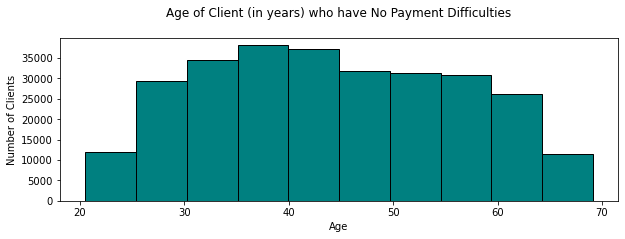

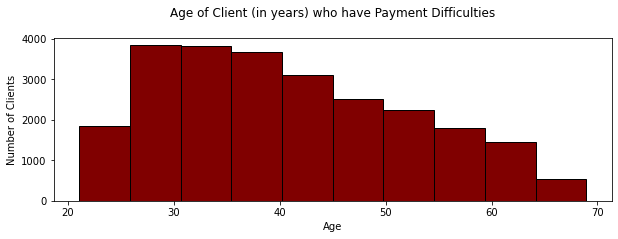

In [84]:
plt.figure(figsize=(10,3))
plt.hist(train_data['DAYS_BIRTH'].values/-365, bins=10, edgecolor='black', color='steelblue')
plt.title('Age of Client (in years) at the time of Application\n')
plt.xlabel('Age Bucket')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(no_age, bins=10, edgecolor='black', color='teal')
plt.title('Age of Client (in years) who have No Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(yes_age, bins=10, edgecolor='black', color='maroon')
plt.title('Age of Client (in years) who have Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

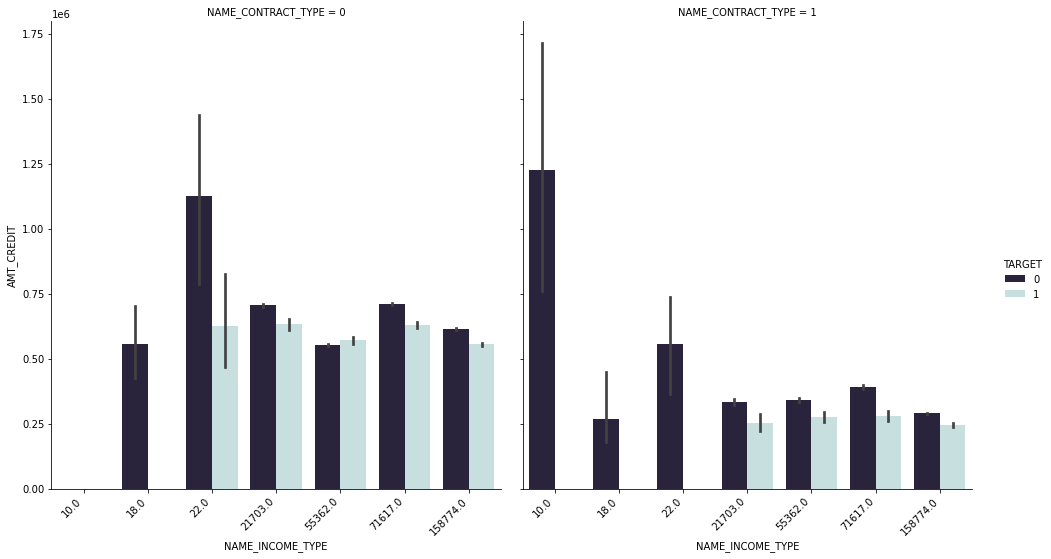

In [85]:
figure = sns.catplot(x = 'NAME_INCOME_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', 
            col = 'NAME_CONTRACT_TYPE', 
            kind = 'bar', palette = 'ch:start=0.2,rot=-.3_r',
            data = data_train)

figure.set_xticklabels(rotation=45, horizontalalignment='right')
plt.gcf().set_size_inches(15, 8)
plt.show()

**Modelling Data**

In [87]:
data = import_data('/Users/mac/Downloads/home-credit-default-risk/data_final.csv')

Memory usage of dataframe is 282.67 MB
Memory usage after optimization is: 78.82 MB
Decreased by 72.1%


In [88]:
data.head()

,Unnamed: 0.1,Unnamed: 0,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,Bureau_AMT_CREDIT_SUM_OVERDUE,Bureau_AMT_ANNUITY,Bureau_Balance_STATUS_1,Bureau_Balance_STATUS_5,Prev_AMT_ANNUITY,Prev_AMT_APPLICATION,Prev_AMT_CREDIT,Prev_AMT_DOWN_PAYMENT,Prev_AMT_GOODS_PRICE,TARGET
0,0,0,100002,0,0,0,0,202500.0,406597.5,24700.5,...,0.0,6712.5,0.0,0.0,27468.824219,641848.50000,630571.500000,60000.000000,641848.50000,1.0
1,1,1,100003,0,0,1,0,270000.0,1293502.5,35698.5,...,0.0,6712.5,0.0,0.0,13039.485352,201525.75000,257522.250000,8250.000000,241830.90625,0.0
2,2,2,100004,1,1,0,0,67500.0,135000.0,6750.0,...,0.0,6712.5,0.0,0.0,9623.115234,66690.00000,72696.375000,4785.750000,88920.00000,0.0
3,3,3,100006,0,0,0,0,135000.0,312682.5,29686.5,...,0.0,6712.5,0.0,0.0,28022.556641,259705.00000,272578.500000,956.904541,284438.81250,0.0
4,4,4,100007,0,0,0,0,121500.0,513000.0,21865.5,...,0.0,6712.5,0.0,0.0,21187.628906,179037.71875,208061.640625,2076.750000,263290.75000,0.0


In [89]:
data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

In [90]:
data.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,Bureau_AMT_CREDIT_SUM_OVERDUE,Bureau_AMT_ANNUITY,Bureau_Balance_STATUS_1,Bureau_Balance_STATUS_5,Prev_AMT_ANNUITY,Prev_AMT_APPLICATION,Prev_AMT_CREDIT,Prev_AMT_DOWN_PAYMENT,Prev_AMT_GOODS_PRICE,TARGET
0,100002,0,0,0,0,202500.0,406597.5,24700.5,351000.0,248526.0,...,0.0,6712.5,0.0,0.0,27468.824219,641848.50000,630571.500000,60000.000000,641848.50000,1.0
1,100003,0,0,1,0,270000.0,1293502.5,35698.5,1129500.0,40149.0,...,0.0,6712.5,0.0,0.0,13039.485352,201525.75000,257522.250000,8250.000000,241830.90625,0.0
2,100004,1,1,0,0,67500.0,135000.0,6750.0,135000.0,248526.0,...,0.0,6712.5,0.0,0.0,9623.115234,66690.00000,72696.375000,4785.750000,88920.00000,0.0
3,100006,0,0,0,0,135000.0,312682.5,29686.5,297000.0,248526.0,...,0.0,6712.5,0.0,0.0,28022.556641,259705.00000,272578.500000,956.904541,284438.81250,0.0
4,100007,0,0,0,0,121500.0,513000.0,21865.5,513000.0,248526.0,...,0.0,6712.5,0.0,0.0,21187.628906,179037.71875,208061.640625,2076.750000,263290.75000,0.0


In [91]:
train_data = data[:307511]
test_data = data[307511:]

In [92]:
train_data.drop(['SK_ID_CURR'], inplace=True, axis=1)

In [93]:
train_data.head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,Bureau_AMT_CREDIT_SUM_OVERDUE,Bureau_AMT_ANNUITY,Bureau_Balance_STATUS_1,Bureau_Balance_STATUS_5,Prev_AMT_ANNUITY,Prev_AMT_APPLICATION,Prev_AMT_CREDIT,Prev_AMT_DOWN_PAYMENT,Prev_AMT_GOODS_PRICE,TARGET
0,0,0,0,0,202500.0,406597.5,24700.5,351000.0,248526.0,158774.0,...,0.0,6712.5,0.0,0.0,27468.824219,641848.50000,630571.500000,60000.000000,641848.50000,1.0
1,0,0,1,0,270000.0,1293502.5,35698.5,1129500.0,40149.0,21703.0,...,0.0,6712.5,0.0,0.0,13039.485352,201525.75000,257522.250000,8250.000000,241830.90625,0.0
2,1,1,0,0,67500.0,135000.0,6750.0,135000.0,248526.0,158774.0,...,0.0,6712.5,0.0,0.0,9623.115234,66690.00000,72696.375000,4785.750000,88920.00000,0.0
3,0,0,0,0,135000.0,312682.5,29686.5,297000.0,248526.0,158774.0,...,0.0,6712.5,0.0,0.0,28022.556641,259705.00000,272578.500000,956.904541,284438.81250,0.0
4,0,0,0,0,121500.0,513000.0,21865.5,513000.0,248526.0,158774.0,...,0.0,6712.5,0.0,0.0,21187.628906,179037.71875,208061.640625,2076.750000,263290.75000,0.0


In [94]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 101 entries, NAME_CONTRACT_TYPE to TARGET
dtypes: float16(39), float32(21), int16(2), int32(5), int8(34)
memory usage: 64.5 MB


In [95]:
train_data.iloc[:,:79] = data_train.iloc[:,:79].abs()

In [96]:
x = train_data.drop(['TARGET'], axis=1)
y = train_data['TARGET']

In [114]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Features', 'Score']
print('The features that correlate well with target feature:\n')
featureScores.sort_values(by=['Score'], ascending=False)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [101]:
# create two different dataframe of majority and minority class 
df_majority = train_data[(train_data['TARGET']==0)] 
df_minority = train_data[(train_data['TARGET']==1)] 

# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 282686, # to match majority class
                                 random_state=42)  # reproducible results

# combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

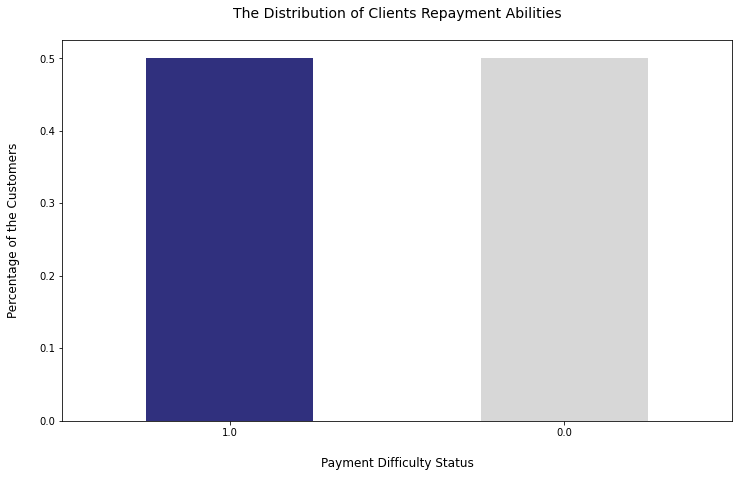

In [102]:
fig = plt.figure(figsize = (12,7))
df_upsampled['TARGET'].value_counts(normalize=True).plot(kind='bar', color= ['midnightblue','lightgrey'], alpha = 0.9, rot=0)
plt.title('The Distribution of Clients Repayment Abilities\n', fontsize=14)
plt.ylabel('Percentage of the Customers\n', fontsize=12)
plt.xlabel('\nPayment Difficulty Status', fontsize=12)
plt.show()

In [106]:
x_balanced = df_upsampled[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 
                           'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 
                           'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 
                           'Bureau_AMT_CREDIT_SUM_DEBT', 'DAYS_ID_PUBLISH', 'NAME_TYPE_SUITE',
                          'Bureau_AMT_CREDIT_SUM_OVERDUE', 'AMT_ANNUITY', 'FONDKAPREMONT_MODE', 'Bureau_AMT_CREDIT_MAX_OVERDUE',
                          'Bureau_AMT_CREDIT_SUM', 'Bureau_AMT_ANNUITY']]
y_balanced = df_upsampled['TARGET']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(452297, 18) (113075, 18)


In [108]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

**Logistic Regression**

In [115]:
log_model = LogisticRegression().fit(X_train, y_train)
print(log_model)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [116]:
# predict data train
y_train_pred_log = log_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred_log))

NameError: name 'log_model' is not defined

In [117]:
# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_train, y_train_pred_log)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

NameError: name 'y_train_pred_log' is not defined

In [118]:
# predict data test
y_test_pred_log = log_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred_log))

NameError: name 'log_model' is not defined

In [119]:
# form confusion matrix as a dataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, y_test_pred_log)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

NameError: name 'y_test_pred_log' is not defined

In [120]:
acc_log_train=round(log_model.score(X_train,y_train)*100,2)
acc_log_test=round(log_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

NameError: name 'log_model' is not defined

In [ ]:
# ROC scores
roc_auc_log = round(roc_auc_score(y_test, y_test_pred_log),4)
print('ROC AUC:', roc_auc_log)

**Gaussian Naive Bayes**

In [121]:
gnb_model = GaussianNB().fit(X_train, y_train)
print(gnb_model)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# predict data train
y_train_pred_gnb = gnb_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Gaussian Naive Bayes):')
print(classification_report(y_train, y_train_pred_gnb))

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_train, y_train_pred_gnb)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gaussian Naive Bayes)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
# predict data test
y_test_pred_gnb = gnb_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Gaussian Naive Bayes):')
print(classification_report(y_test, y_test_pred_gnb))

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_test, y_test_pred_gnb)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gaussian Naive Bayes)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
acc_nb_train=round(gnb_model.score(X_train,y_train)*100,2)
acc_nb_test=round(gnb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_nb_train))
print("Test Accuracy: % {}".format(acc_nb_test))

In [ ]:
# ROC scores
roc_auc_gnb = round(roc_auc_score(y_test, y_test_pred_gnb),4)
print('ROC AUC:', roc_auc_gnb)

**Neural Network**

In [ ]:
nn_model = MLPClassifier().fit(X_train, y_train)

In [ ]:
# predit data train
y_train_pred_nn = nn_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Neural Network):')
print(classification_report(y_train, y_train_pred_nn))

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_nn = pd.DataFrame((confusion_matrix(y_train, y_train_pred_nn)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_nn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Neural Network)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
# predit data test
y_test_pred_nn = nn_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Neural Network):')
print(classification_report(y_test, y_test_pred_nn))

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_nn = pd.DataFrame((confusion_matrix(y_test, y_test_pred_nn)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_nn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Neural Network)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
acc_nn_train=round(nn_model.score(X_train,y_train)*100,2)
acc_nn_test=round(nn_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_nn_train))
print("Test Accuracy: % {}".format(acc_nn_test))

In [ ]:
# ROC scores
roc_auc_nn = round(roc_auc_score(y_test, y_test_pred_nn),4)
print('ROC AUC:', roc_auc_nn)

**Random Forest**

In [ ]:
# train the model
rf_model = RandomForestClassifier().fit(X_train, y_train)
print(rf_model)

In [ ]:
# predict data train
y_train_pred_dt = rf_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_dt))

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
# predict data test
y_test_pred_rf = rf_model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report

# print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred_rf))

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
acc_rf_train=round(rf_model.score(X_train,y_train)*100,2)
acc_rf_test=round(rf_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_rf_train))
print("Test Accuracy: % {}".format(acc_rf_test))

In [ ]:
roc_auc_rf = round(roc_auc_score(y_test, y_test_pred_rf),4)
print('ROC AUC:', roc_auc_rf)

**Decision Tree**

In [ ]:
# train the model
dt_model = DecisionTreeClassifier().fit(X_train,y_train)
print(dt_model)

In [ ]:
# predict data train
y_train_pred_dt = dt_model.predict(X_train)

# print classification report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_dt))

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Decision Tree Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
# predict data test
y_test_pred_dt = dt_model.predict(X_test)

# print classification report
print('Classification Report Testing Model (Decision Tree Classifier):')
print(classification_report(y_test, y_test_pred_dt)

In [ ]:
# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_test, y_test_pred_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Decision Tree Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [ ]:
acc_dt_train=round(dt_model.score(X_train,y_train)*100,2)
acc_dt_test=round(dt_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_dt_train))
print("Test Accuracy: % {}".format(acc_dt_test))

In [ ]:
# ROC scores
roc_auc_dt = round(roc_auc_score(y_test, y_test_pred_dt),4)
print('ROC AUC:', roc_auc_dt)

**Selection Best Method**



In [ ]:
results = pd.DataFrame([["Logistic Regression", 0.5993, 0.6007, 0.6007],["Gaussian Naive Bayes", 0.5501, 0.552, 0.5518],
                       ["Decision Tree", 1, 0.7511, 0.7512],["Random Forest", 1, 0.9697, 0.9697],
                       ["Neural Network", 0.6381, 0.6306, 0.6307]],
                        columns = ["Models", "Training Accuracy Score", "Testing Accuracy Score", "ROC Score"])

results.sort_values(by=['Training Accuracy Score', 'Testing Accuracy Score'], ascending=False).style.background_gradient(cmap='Blues')

**Prediction**

In [ ]:
data_test.head()

In [ ]:
data_test.iloc[:,:] = data_test.iloc[:,:].abs()

In [ ]:
# check for empty elements
print('Missing values status:', test_data.isnull().values.any())
tvc = pd.DataFrame(test_data.isnull().sum(), columns=['Total Null Values'])
tvc['Percentage'] = (tvc['Total Null Values']/test_data.shape[0])*100
tvc.sort_values(by=['Total Null Values'], ascending=False).reset_index()

In [ ]:
#detecting duplication
print('The number of duplication is:', data_test.duplicated().sum())

In [ ]:
# define x and y features (top 20 features)
pred_test = test_data[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 
                           'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 
                           'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 
                           'Bureau_AMT_CREDIT_SUM_DEBT', 'DAYS_ID_PUBLISH', 'NAME_TYPE_SUITE',
                          'Bureau_AMT_CREDIT_SUM_OVERDUE', 'AMT_ANNUITY', 'FONDKAPREMONT_MODE', 'Bureau_AMT_CREDIT_MAX_OVERDUE',
                          'Bureau_AMT_CREDIT_SUM', 'Prev_CCB_AMT_DRAWINGS_CURRENT', 'Bureau_AMT_ANNUITY', 'Prev_CCB_AMT_PAYMENT_TOTAL_CURRENT']]
pred_test.head()

In [ ]:
predict = pd.Series(rf_model.predict(pred_test), name = "TARGET").astype(int)
sk_id = test_data['SK_ID_CURR'].copy()
sk_id.reset_index(drop=True, inplace=True)
results = pd.concat([sk_id, predict], axis = 1)
results.head()